## Tutorial #3: Baseline Correction

As EEG is a time-resolving signal, it may often have temporal drifts which are unrelated to our experimental question. Various internal and external sources may cause temporal drifts, which change over time, and also across electrodes.
To reduce the effect of such drifts, it is custom to perform a so-called baseline correction. Essentially, this consists of using EEG activity over a baseline period, i.e. before an external event occurs, to correct activity over a post-stimulus interval, i.e. the time after an external event occurs.
Various approaches exist for baseline correction. The traditional way is subtracting the mean of a baseline period from every time point of the baseline and post-stimulus interval. In other words, the average voltage values of each electrode are calculated within a time interval and then this average is substracted from that time interval of the signal.

### Baseline Correction In Practice:

#### 1.) Baseline Correction with MNE
To apply baseline correction in MNE, a time interval should be passed as a paramenter to apply_baseline() function of epochs object. If 'None' is given as time interval, baseline correction will not be applied. To apply baseline correction to the all time interval, (None,None) should be used. This function returns baseline-corrected epochs object and note that it modifies the object as well. 

In [1]:
# For elimiating warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import mne
import mne.viz
import numpy as np
%matplotlib inline

In [3]:
#Load epoched data
data_file = '../datasets/904_1_PDDys_ODDBALL_Clean_curated.fif'
# Read the EEG epochs:
epochs = mne.read_epochs(data_file, verbose='error')

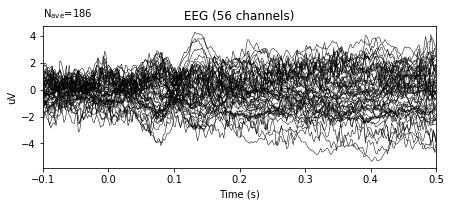

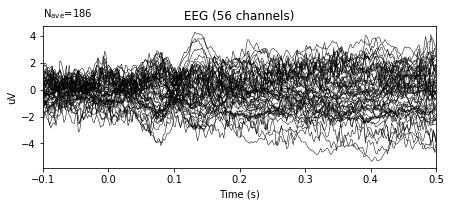

In [4]:
# Plot of initial evoked object
epochs.average().plot()

As mentioned before, the initial signal will be modified by baseline correction. If you want to keep the initial epoch object without any change it should be copied to another variable before calling apply_baseline() function. Otherwise it will be lost. In python, shallow copies can be modified when the original object is modified. However, deep copies are independent from the original object. So, in our case we need a deep copy of epochs object.

##### Selecting baseline interval
Usually, baseline interval is selected as prestimulus to stimulus onset time interval in our example this interval is -100ms to 0ms which is the beginning of the stimulus.

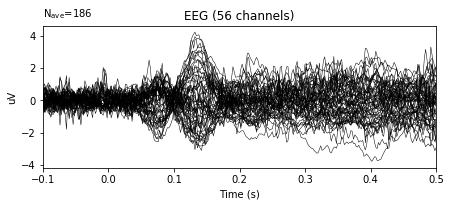

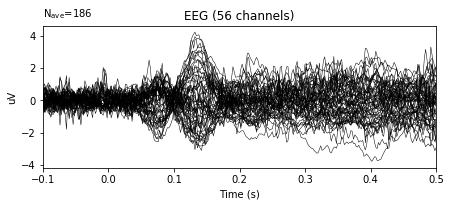

In [23]:
import copy
epochs_wo_bc = copy.deepcopy(epochs)
# baseline correction
inteval = (-0.1, 0)
bc_epochs = epochs.apply_baseline(inteval)

# Plot of baseline-corrected evoked signal
bc_epochs.average().plot()

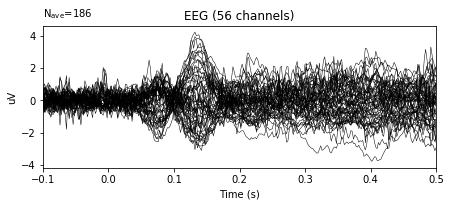

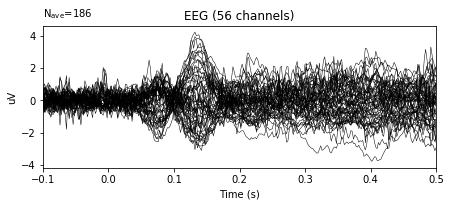

In [24]:
#Modified evoked object
epochs.average().plot()

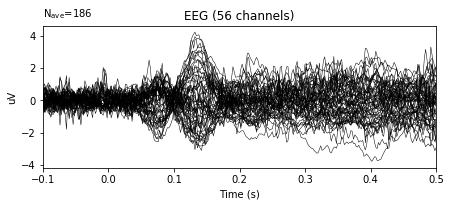

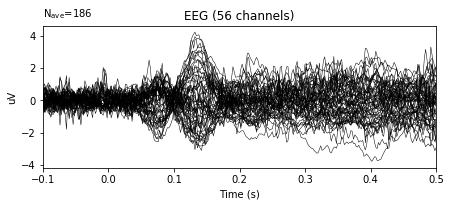

In [25]:
epochs_wo_bc.average().plot()

In the example above, the variance in the amplitudes of given signal decreased significantly.  

Alternatively a similar observation can be made via plots that show single trials and the average as in the plots below. In these plots black line represents the average and the rest is single trials. 

Note that these plots are drawn by using Matplotlib library of Python.

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

def plotChannel(ch_index, with_baselineCorrection, without_baselineCorrection):

    ch = ch_index 
    data_types = ['original', 'bc']

    for i in range(len(data_types)):

        fig, ax = plt.subplots(figsize=(20, 10))
        ax.set_xlabel('Time instances')
        ax.set_ylabel('Volt')
        #plt.ylim(-1.1, 1.5) 
        if data_types[i] == 'bc': 
            plt.title('Plot of Single Trials with Baseline Correction')
            for i in range(len(with_baselineCorrection.get_data())):   
                ax.plot(with_baselineCorrection.times, with_baselineCorrection.get_data()[i,ch,:])
            ax.plot(with_baselineCorrection.average().times, with_baselineCorrection.average().data[ch,:], color='black', label='Average of Trials')

        else:
            plt.title('Plot of Single Trials without Baseline Correction')
            for i in range(len(without_baselineCorrection.get_data())):   
                ax.plot(without_baselineCorrection.times, without_baselineCorrection.get_data()[i,ch,:])
            ax.plot(without_baselineCorrection.average().times, without_baselineCorrection.average().data[ch,:], color='black', label='Average of Trials')

        legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
        plt.show()

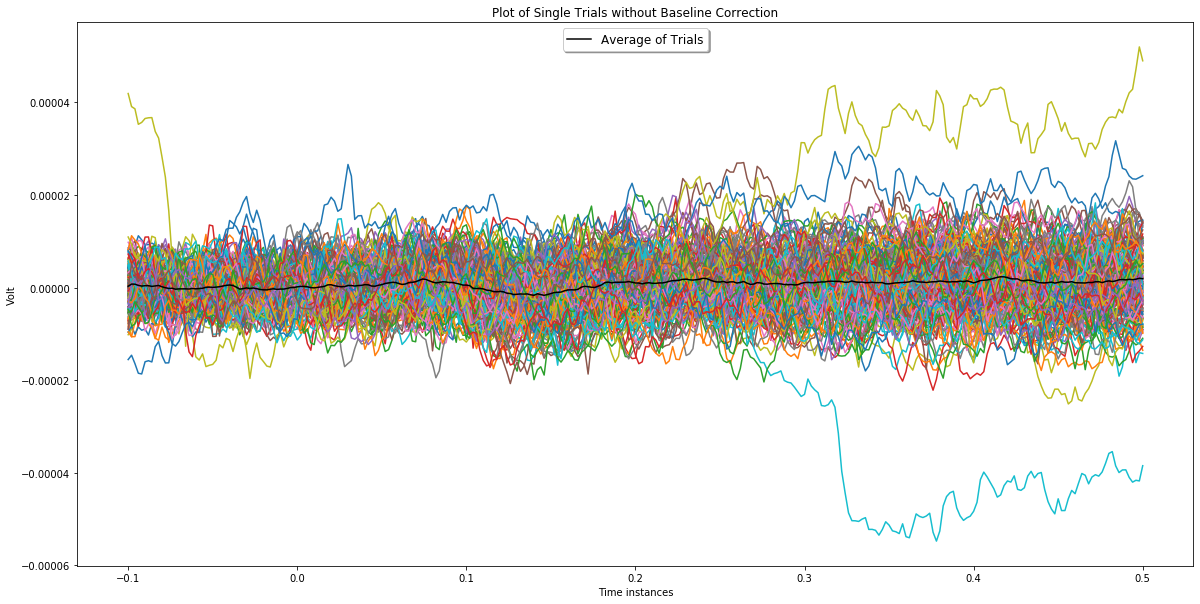

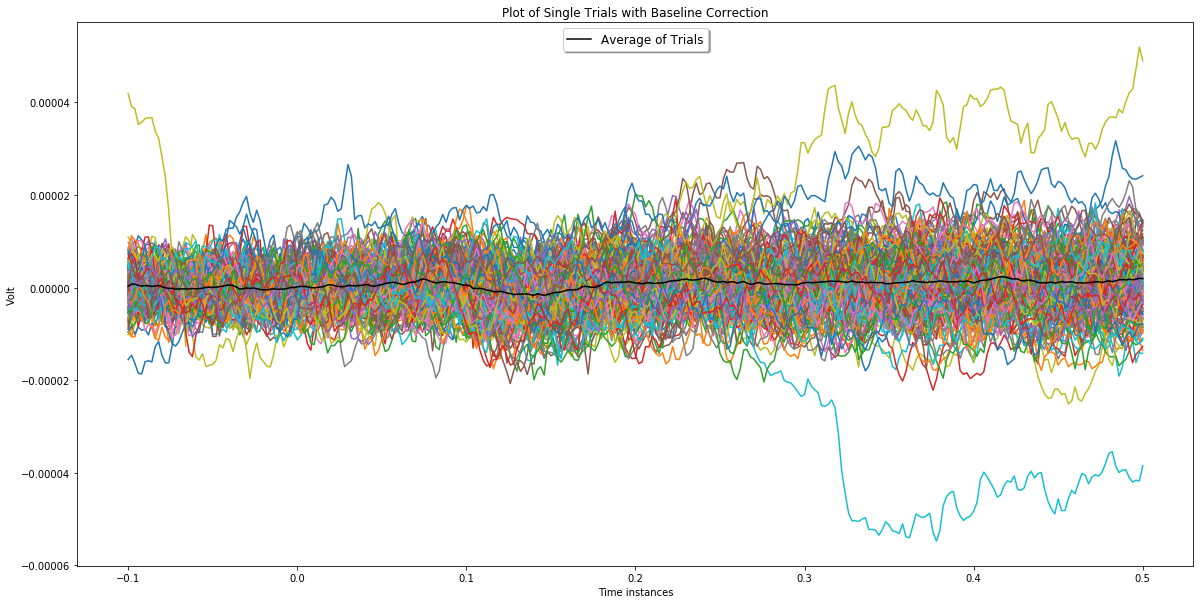

In [27]:
ch_index = 5
plotChannel(ch_index, bc_epochs, epochs_wo_bc)

In the plot above, the effect of baseline correction can be easily regcognized for epochs plotted in yellow, green and orange. You can see yellow and green ones on negative value region and orange one on postive value region of the first plot in which baseline correction is not applied. After baseline correction, their amplitudes decreased drastically.

#### 2.) Manual Baseline Correction

Altough baseline correction is avaible in MNE, it can be easily applied manually without depending on any library or package.

In [28]:
epochs_for_bc = copy.deepcopy(epochs_wo_bc)

Firstly, select a time interval for baseline calculation. For each epoch calculate the mean of selected time interval. By doing that we have the baseline values for each epoch in the dataset. 

In [29]:
time_interval = [-0.1, 0]
interval_baseline = [i for i in epochs_for_bc.times if i >= time_interval[0] and i <= time_interval[1]]
baseline = []
data = epochs_for_bc.get_data()
for e in range(data.shape[0]):
    avg_epoch = np.mean(data[e,:,:len(interval_baseline)], axis=1)
    baseline.append(avg_epoch)
baseline = np.asarray(baseline)

The last step of baseline correction is to subtract baseline values calculated for each epoch from epoch data.

In [30]:
for e in range(len(epochs_for_bc.get_data())):
    for i in range(len(epochs_for_bc.ch_names)):   
        epochs_for_bc.get_data()[e,i,:] = epochs_for_bc.get_data()[e,i,:] - baseline[e,i]

Plot channel 3 before and after applying baseline correction.

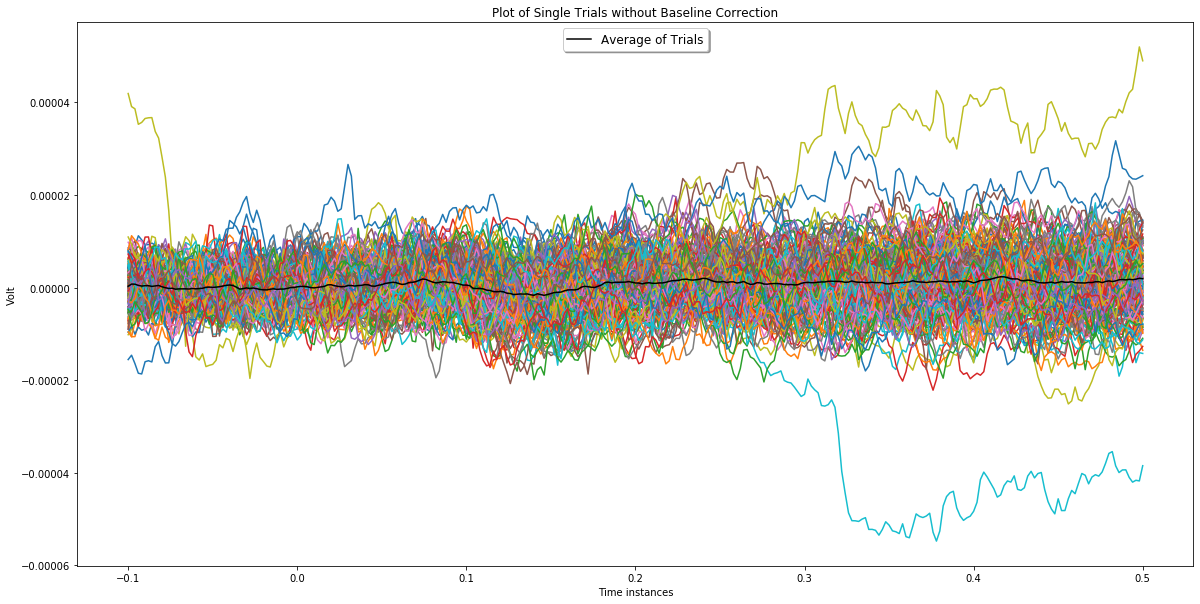

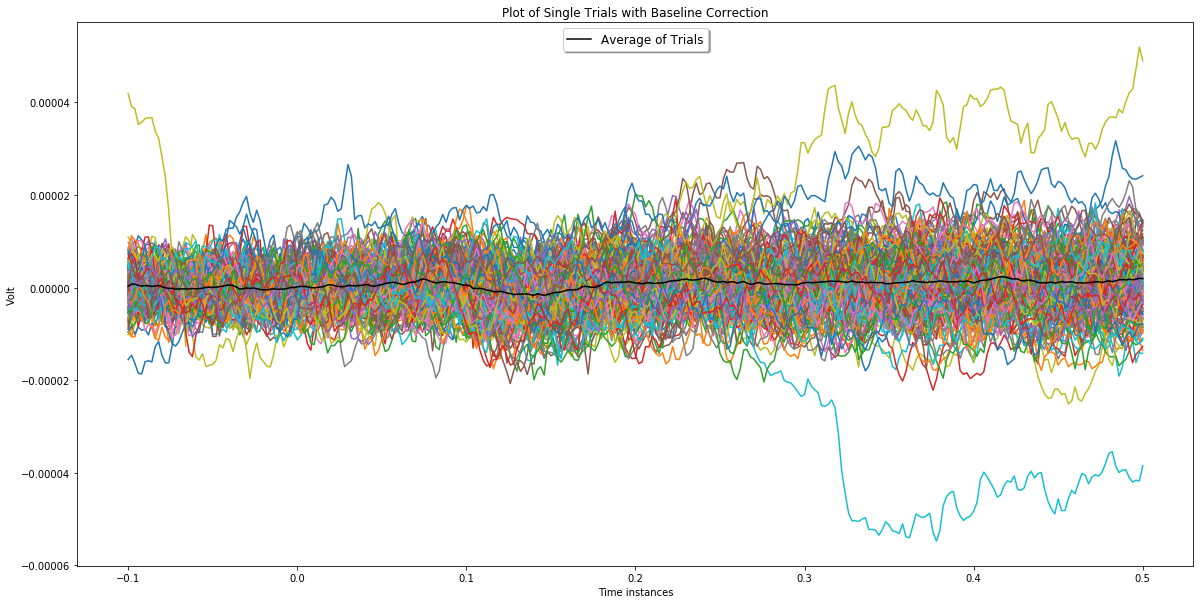

In [31]:
plotChannel(ch_index, epochs_for_bc, epochs_wo_bc)

To check wether the manual baseline calculation is correct, select an epoch as in the example below and subtract baseline corrected epoch data from epoch data before applying baseline correction for both mne and manual baseline correction. As the results, we will get an array of baseline values for both approach. Finally compare the baseline values. If all baseline values are the same, we can conclude that our calculation is correct. 

In [32]:
manual_baseline_values = np.subtract(epochs_wo_bc._data[1,:,:], epochs_for_bc._data[1,:,:])
mne_baseline_values = np.subtract(epochs_wo_bc._data[1,:,:], bc_epochs._data[1,:,:])

if manual_baseline_values.all() == mne_baseline_values.all():
    print('Baseline values calculated manually and via MNE are the same !!!')
else:
    print('Baseline values are different !!!')

Baseline values calculated manually and via MNE are the same !!!


MNE provides apply_baseline function with the method of subtracting mean of baseline interval from data. Therefore, the same method is followed for manual baseline correction in this tutorial. However, it is worth noting that there are other approaches developed for baseline correction.

##### Exercise: 

Check other baseline corection methods and try to apply one of them.